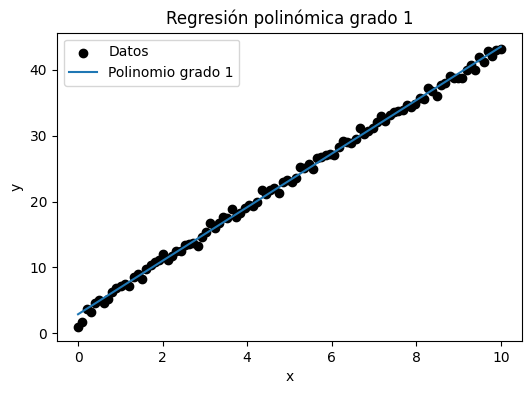

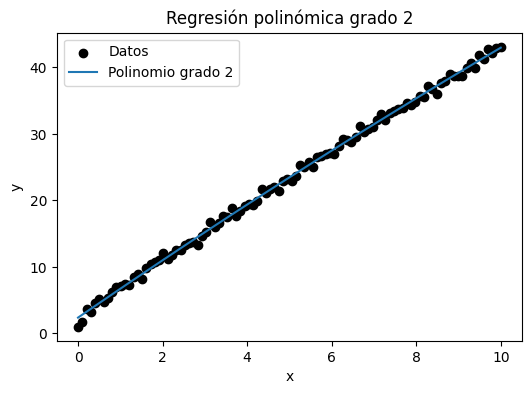

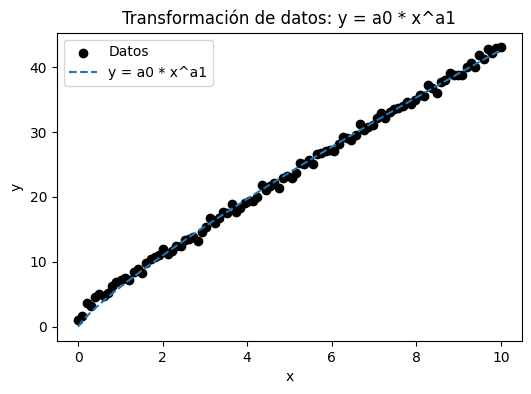

C:\Users\JOSE ANTONIO\AppData\Local\Temp\ipykernel_13716\1804932116.py:49: RuntimeWarning: overflow encountered in exp
  return a0 * x - a1 * np.exp(-a2 * x)
C:\Users\JOSE ANTONIO\AppData\Local\Temp\ipykernel_13716\1804932116.py:52: RuntimeWarning: overflow encountered in exp
  return a0 * x**2 - a1 * np.exp(-a2 * x)


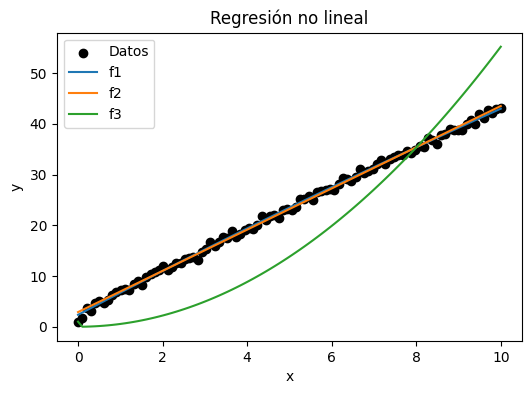

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

# Cargar los datos
data = np.loadtxt('../Parcial 1/Datos.txt')
x = data[:, 0]
y = data[:, 1]

# Ajustar valores negativos sumando un desplazamiento
min_y = min(y)
if min_y < 0:
    y += abs(min_y) + 1  # Desplazamos hacia arriba

# Ajuste de regresión lineal para polinomios de grado 1, 2 y 3
for degree in range(1, 4):  # Ahora graficamos polinomios de grado 1, 2 y 3
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Datos', color='black')
    poly = Polynomial.fit(x, y, degree)
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = poly(x_fit)
    plt.plot(x_fit, y_fit, label=f'Polinomio grado {degree}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión polinómica grado {degree}')
    plt.show()

# Ajuste de la función y = a0 * x^a1
def power_law(x, a0, a1):
    return a0 * x**a1

params, _ = curve_fit(power_law, x, y, p0=[1, 1])
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Datos', color='black')
plt.plot(x_fit, power_law(x_fit, *params), label='y = a0 * x^a1', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformación de datos: y = a0 * x^a1')
plt.show()

# Ajuste de regresión no lineal a las funciones dadas
def func1(x, a0, a1, a2):
    return a0 - a1 * np.exp(-a2 * x)

def func2(x, a0, a1, a2):
    return a0 * x - a1 * np.exp(-a2 * x)

def func3(x, a0, a1, a2):
    return a0 * x**2 - a1 * np.exp(-a2 * x)

# Ajustar y graficar las funciones
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Datos', color='black')

for func, label in zip([func1, func2, func3], ['f1', 'f2', 'f3']):
    params, _ = curve_fit(func, x, y, p0=[1, 1, 1])
    plt.plot(x_fit, func(x_fit, *params), label=label)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión no lineal')
plt.show()